In [1]:
import pandas as pd
import numpy as np
from load_data import load_data_from_driving_log
#from IPython import display
#import time
#import cv2

X_data, y_data = load_data_from_driving_log("joystick_data")

n_train = X_data.shape[0]
n_classes = len(np.unique(y_data))

print("Number of training examples =", n_train)
print("Number of classes =", n_classes)

number of non zero steering examples,  4851
number of zero steering examples,  3047
Number of training examples = 7898
Number of classes = 144


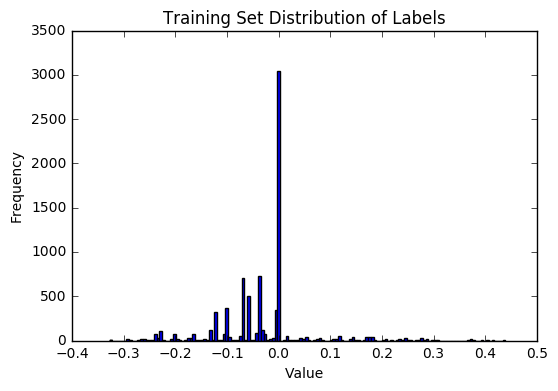

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()

plt.hist(y_data, n_classes)

plt.title("Training Set Distribution of Labels")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig = plt.gcf()
plt.show()

In [ ]:
#plt.hist(steeringAngleList.astype('float'), bins=100)
plt.hist(y_data.astype('float'), bins=100)

In [ ]:
num_images = 20
fig = plt.figure()

indices = np.random.choice(X_dataset.shape[0], num_images)

for i in range(num_images):
    a = fig.add_subplot(num_images, 1, i+1)
    subtitle = "test, {0}".format(y_dataset[i])
    a.title.set_text(subtitle)
#    a.set_anchor('W')
    plt.imshow(X_dataset[indices[i], :, :])
#    plt.imshow(X_dataset[i, :, :])

    plt.show()

#plt.tight_layout(h_pad=1.0)
plt.show()

In [ ]:

data_dir = "new_data"
driving_log = pd.read_csv(data_dir + "/driving_log.csv")

for i in range(10):
    image_path = driving_log['center'][i]
    a = fig.add_subplot(10, 1, i+1)
    label = driving_log['steering'][i]
    
    image = Image.open(image_path)
    image_array = cv2.imread(image_path)
    image_array = cv2.cvtColor(image_array, cv2.COLOR_BGR2RGB)
        
    plt.imshow(image_array)
    plt.show()
    print(label, i)


In [ ]:
#%load_ext autoreload
#%autoreload 2

from generator import data_generator

datagen = data_generator(driving_log, 1, 10)

X, y = next(datagen)
for i in range(X.shape[0]):
    a = fig.add_subplot(X.shape[0], 1, i+1)
    label = y[i]
    image = X[i]
    print(image.shape)
    plt.imshow(image)
    plt.show()
    print(label, i)

In [ ]:
print("test")

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# This enables high res graphics inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# JB's favorite Seaborn settings for notebooks (without grid for image viewing)
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18}

sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

def display_images(images, labels):

    num_images = len(images)

    # Display various LUTs
    with sns.axes_style('white'):
    
        fig, ax = plt.subplots(int(num_images/3), 3, figsize=(12, 10))

        row = 0
        col = 0
    
        for i in range(num_images):
        
            print("i/row/col: ", i, row, col)
            
            image_array = images[i]
            label = labels[i]

            ax[row,col].imshow(image_array)
            ax[row,col].set_title(label)
        
            if i > 1 and ((i+1) % 3) == 0:
                print("incrementing row", row)
                row += 1
            
            if col == 2:
                col = 0
            else:
                col +=1

In [ ]:
from preprocessing import load_images

data_dir = "udacity_data"
driving_log = pd.read_csv(data_dir + "/driving_log.csv")

print(len(driving_log))

images = load_images(driving_log['center'][0:12].as_matrix())
labels = driving_log['steering'][0:12].as_matrix()

display_images(images, labels)

In [ ]:
%load_ext autoreload
#%autoreload 2
#%aimport preprocessing

#import autoreload
%autoreload 2

#%aimport preprocessing

#?autoreload


In [ ]:
from preprocessing import get_left_images

#import preprocessing

left_images, left_labels = get_left_images(driving_log)
left_images = left_images[0:12]
left_labels = left_labels[0:12]
left_images = load_images(left_images)

display_images(left_images, left_labels)

In [ ]:
from preprocessing import get_right_images
right_images, right_labels = get_right_images(driving_log)

right_images = right_images[0:12]
right_labels = right_labels[0:12]
right_images = load_images(right_images)

display_images(right_images, right_labels[0:12])

In [ ]:
from preprocessing import resize_image
images = driving_log["center"][0:12].as_matrix()
images = load_images(images)
labels = driving_log["steering"][0:12].as_matrix()

display_images(images, labels)

print("RESIZED BELOW")

resized_images = list(map(resize_image, images))

display_images(resized_images, labels)

In [ ]:
from preprocessing import horizontal_flip_image

flipped_images = []
flipped_labels = []

for i in range(len(images)):
    flipped_image, flipped_label = horizontal_flip_image(images[i], labels[i])
    flipped_images.append(flipped_image)
    flipped_labels.append(flipped_label)

display_images(flipped_images, flipped_labels)

In [ ]:
from generator2 import data_generator

data_dir = "udacity_data"
driving_log = pd.read_csv(data_dir + "/driving_log.csv")

images, labels = next(data_generator(driving_log, 12))
display_images(images, labels)